In [195]:
from datetime import date
from nsepy import get_history
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
my_year_month_fmt = mdates.DateFormatter('%m/%y')



Dataset selection:
Use: https://github.com/swapniljariwala/nsepy
Source OCLHV data for NSE stocks (INFY,TCS) between 2015-2016. Data level - Daily.
Source OCLHV data for NIFTY IT index. Data level - Daily.

# Out of the whole data set only taking  index- NIFTYIT , Stocks (INFY  and TCS)



In [196]:
#Loading Data sets


niftyit = get_history(symbol="NIFTYIT", 
                    start=date(2015,1,1), 
                    end=date(2016,12,31) , index =True )

infy = get_history(symbol="INFY", 
                    start=date(2015,1,1), 
                    end=date(2016,12,31) )

tcs = get_history(symbol="TCS", 
                    start=date(2015,1,1), 
                    end=date(2016,12,31))

## Part 1 



#### 1. Create 4,16,....,52 week moving average(closing price) for each stock and index. This should happen through a function.

In [197]:
def movingavg(x):
    i=4
    while(i <= 52):
        df= x
        st = str(i)+"day"
        ia=i*7
        df[st] = np.round(df["Close"].rolling(window = ia, center = False).mean(), 2)
        i=i+12
    fig, ax = plt.subplots(figsize=(16,9))

    ax.plot( df['Close'], label='Closing-Price')
    ax.plot( df['4day'], label = '4-weeks ')
    ax.plot( df['16day'], label = '16-weeks')
    ax.plot( df['28day'], label = '28-weeks')
    ax.plot( df['40day'], label = '40-weeks')
    ax.plot( df['52day'], label = '52-weeks')
    ax.legend(loc='best')
    ax.set_ylabel('Price in $')
    ax.xaxis.set_major_formatter(my_year_month_fmt)
    
    
    
    return(df)
        
        
    
        
        
    
    
    
    
    
    
    

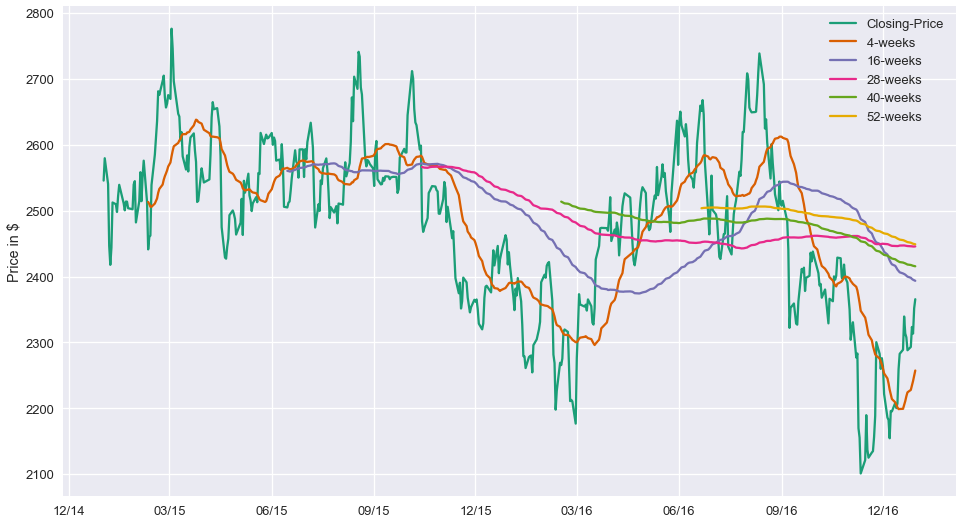

In [198]:
#for TCS
zx =movingavg(tcs)



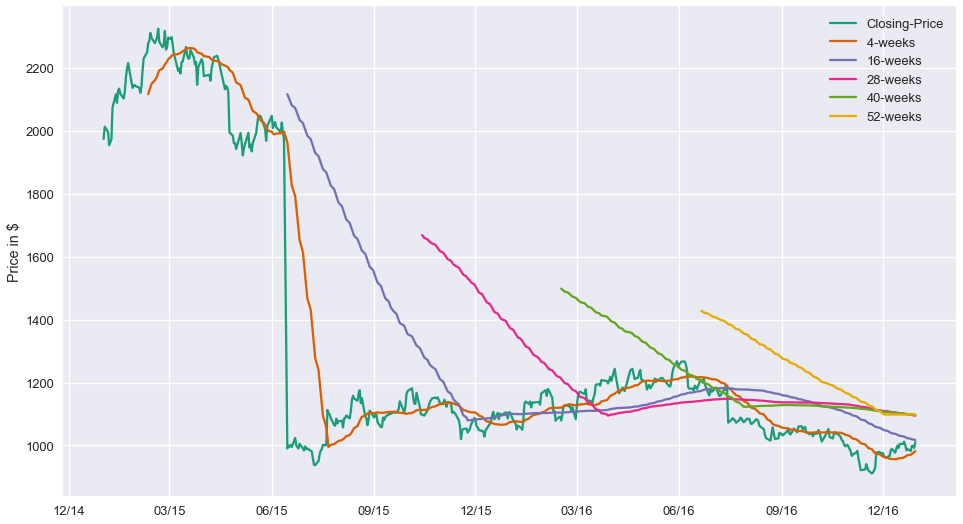

In [199]:
# for INFOSYS
zi =movingavg(infy)


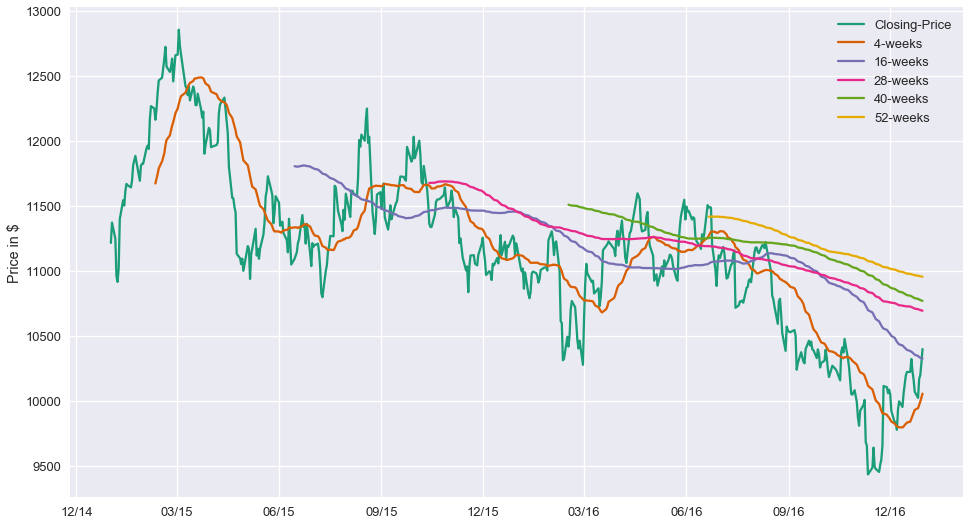

In [200]:
#For NIFTY IT
zn =movingavg(niftyit)

#### 2. Create rolling window of size 10 on each stock/index. Handle unequal time series due to stock market holidays. You should look to increase your rolling window size to 75 and see how the data looks like.

Remember they will create stress on your laptop RAM load. ( Documentation you might need: http://in.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html)

In [201]:
dz =pd.DataFrame(tcs['Close'])
dz["75"] = np.round(dz["Close"].rolling(window = 75, center = False).mean())
dz["10"] = np.round(dz["Close"].rolling(window = 10, center = False).mean())


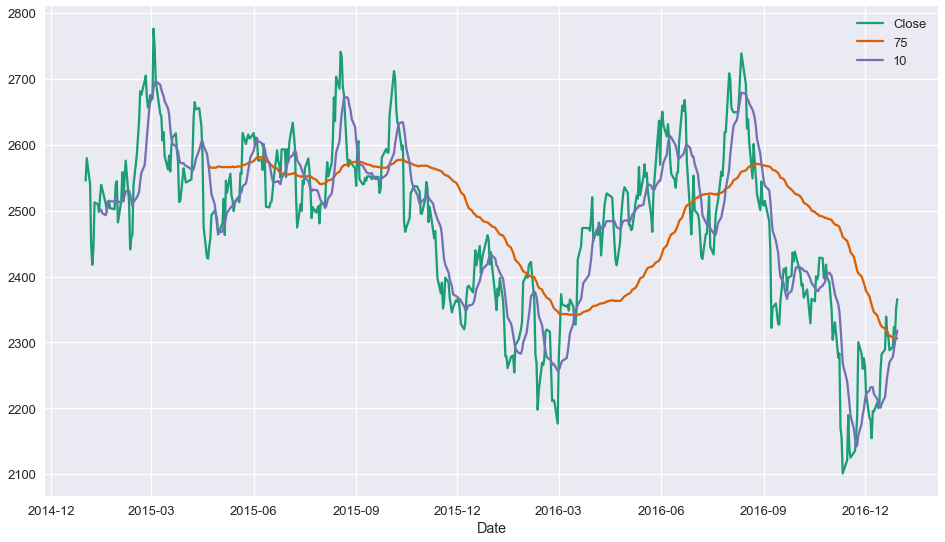

In [202]:
dz.plot(figsize = (16,9))
#75 day moving average is far more smoother than 10 day

#### 3. Create the following dummy time series:

##### 3.1  Volume shocks - If volume traded is 10% higher/lower than previous day - make a 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.

0= higher than 10%

1= lower than 10%

In [203]:
dg =pd.DataFrame(tcs)
dg['shock'] =( (dg['Volume'])  <  (0.1*dg['Volume'].shift() + dg['Volume'].shift())).astype(int)

In [204]:
dg.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,4day,16day,28day,40day,52day,shock
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,NaN,NaN,NaN,NaN,0
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,NaN,NaN,NaN,NaN,NaN,0
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,NaN,NaN,NaN,NaN,NaN,0
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,NaN,NaN,NaN,NaN,NaN,0
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,NaN,NaN,NaN,NaN,NaN,1


##### 3.2  Price shocks - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.

Xt - X(t+1) > 2% of Xt then 0 else 1

In [205]:

dg['price_shock'] =(  abs((dg['Close'] - dg["Close"].shift()))  < (0.02*dg["Close"])).astype(int)

In [206]:
dg.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Trades,Deliverable Volume,%Deliverble,4day,16day,28day,40day,52day,shock,price_shock
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,...,8002,52870,0.2883,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,27585,309350,0.6683,NaN,NaN,NaN,NaN,NaN,0,1
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,...,43234,456728,0.5207,NaN,NaN,NaN,NaN,NaN,0,1
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,...,84503,714306,0.5894,NaN,NaN,NaN,NaN,NaN,0,0
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,...,101741,886368,0.6724,NaN,NaN,NaN,NaN,NaN,1,1


##### 3.3 Pricing black swan - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.

The defination is same as in 3.2 so the below results are produced from the defination of black swan from investopedia.
ie:-
A black swan is an event or occurrence that deviates beyond what is normally expected of a situation and is extremely difficult to predict. 

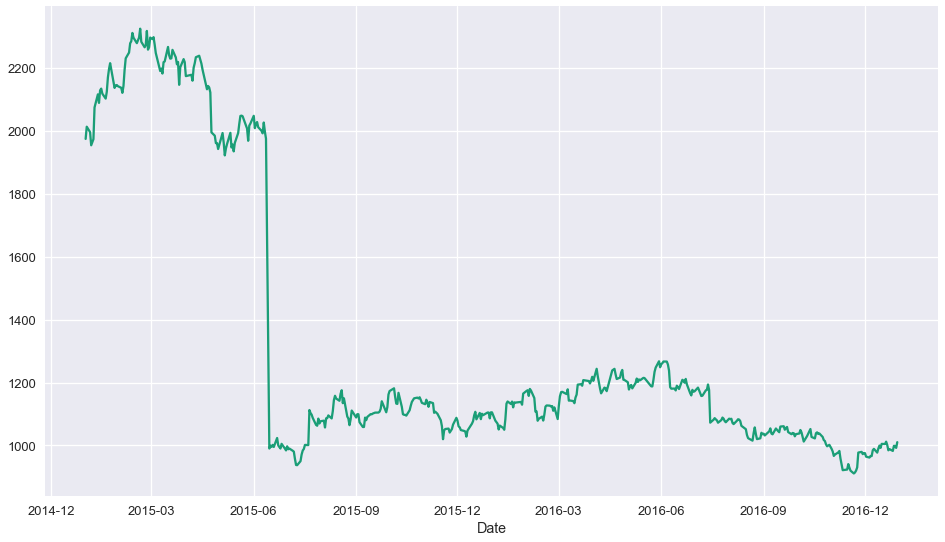

In [207]:
infy['Close'].plot(figsize = (16,9))

The sudden drop is not due to black swan effect rater 
floating of share on 1:1 divident that is the value of shares remain same but the qty is doubled
eg if we have 1 share word 2000 now 2 shares will be given and will worth a thousand each instead.

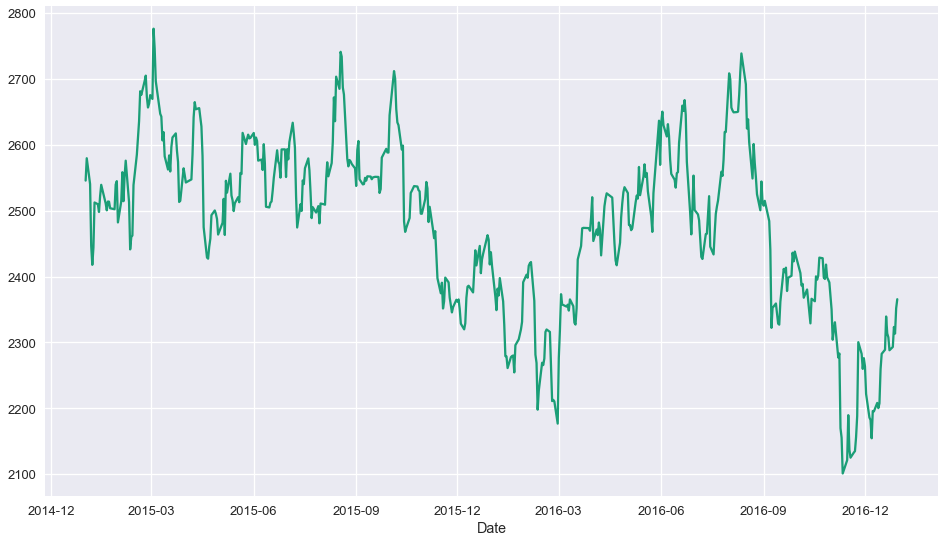

In [208]:
tcs['Close'].plot(figsize = (16,9))

This looks normal

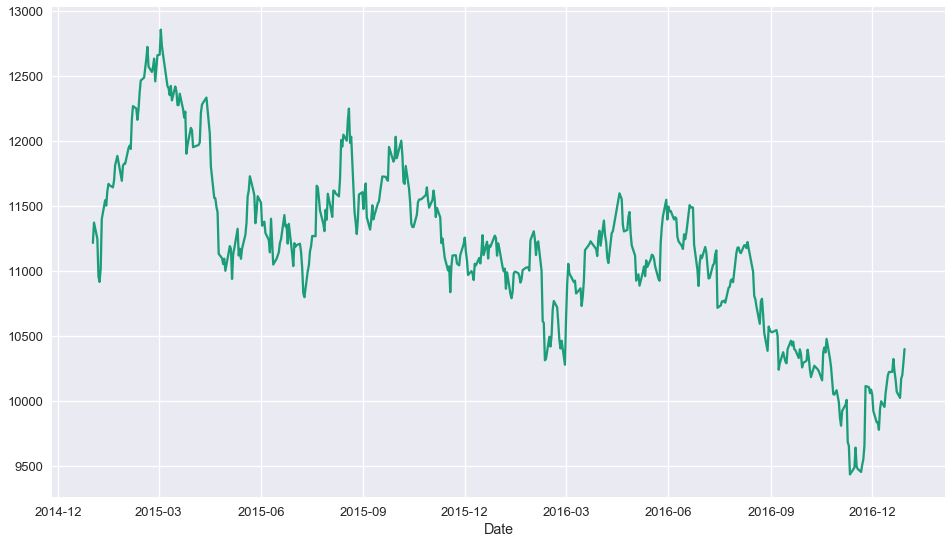

In [209]:
niftyit['Close'].plot(figsize = (16,9))

Again no drastic changes in here .

##### 3.4   Pricing shock without volume shock - based on points a & b - Make a 0/1 dummy time series.
1 when pricing shock =1 and volume shock =0
else 0

In [210]:
dg['Price_W/o_Volume'] = (dg['price_shock'] > dg['shock']  ).astype(int) 
#the types are int so easy stuff just compare and 1>0 should work fine

In [211]:
dg.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,4day,16day,28day,40day,52day,shock,price_shock,Price_W/o_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,...,52870,0.2883,NaN,NaN,NaN,NaN,NaN,0,0,0
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,309350,0.6683,NaN,NaN,NaN,NaN,NaN,0,1,1
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,...,456728,0.5207,NaN,NaN,NaN,NaN,NaN,0,1,1
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,...,714306,0.5894,NaN,NaN,NaN,NaN,NaN,0,0,0
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,...,886368,0.6724,NaN,NaN,NaN,NaN,NaN,1,1,0


# Part 3

#### 1. Quick build any two models. Quick build is defined as grid search of less than 9 permutation combinations. You can choose the two options of multiple multivariate models from those mentioned below. The goal is to to predict INFY,TCS prices for tomorrow

In [212]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,4day,16day,28day,40day,52day,shock,price_shock,Price_W/o_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,...,52870,0.2883,NaN,NaN,NaN,NaN,NaN,0,0,0
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,309350,0.6683,NaN,NaN,NaN,NaN,NaN,0,1,1
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,...,456728,0.5207,NaN,NaN,NaN,NaN,NaN,0,1,1
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,...,714306,0.5894,NaN,NaN,NaN,NaN,NaN,0,0,0
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,...,886368,0.6724,NaN,NaN,NaN,NaN,NaN,1,1,0


In [213]:
#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics  

X = tcs[['High' , 'Low' , 'Volume' , 'price_shock' , 'shock' , 'Open' , 'Last' , 'VWAP']]
y= tcs['Close']
reg = linear_model.LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)



In [214]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [215]:
reg.coef_

array([-1.89047718e-02,  2.50535281e-02,  1.20526115e-07,  4.30409998e-02,
        7.26916185e-01, -6.07275279e-02,  7.69660921e-01,  2.88246328e-01])

In [216]:
reg.score(x_train,y_train)

0.9987193321595214

In [217]:
reg.predict(x_test)

array([2584.82200176, 2485.30709884, 2416.0436438 , 2521.15550196,
       2585.33611362, 2389.04277627, 2385.9976062 , 2613.49632921,
       2493.97966386, 2410.87812234, 2391.23146341, 2368.71458147,
       2255.74118486, 2542.2059265 , 2343.06623247, 2579.47259693,
       2468.56066501, 2467.13976529, 2617.59684295, 2571.30407489,
       2316.50490628, 2500.41088307, 2653.32235452, 2590.25972485,
       2274.77848504, 2446.88247493, 2540.88905269, 2579.00171376,
       2277.38349799, 2494.88447529, 2407.24589043, 2294.61548394,
       2578.86385634, 2542.48841402, 2402.82746531, 2548.06910904,
       2709.17271512, 2530.15987492, 2367.61254409, 2534.10094741,
       2397.7342646 , 2546.72569757, 2341.32193225, 2624.97137775,
       2473.91270303, 2507.39652471, 2608.73344672, 2543.08877097,
       2138.27911818, 2493.99936891, 2512.4175548 , 2604.37516531,
       2602.37269947, 2575.42085194, 2358.53272738, 2506.78364634,
       2497.3655061 , 2530.66829891, 2566.31040073, 2432.19905

In [218]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, (reg.predict(x_test)))  

18.83341543421282

In [219]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, (reg.predict(x_test))))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,(reg.predict(x_test))))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, (reg.predict(x_test)))))  

Mean Absolute Error: 3.2915125135109933
Mean Squared Error: 18.83341543421282
Root Mean Squared Error: 4.339748314616047


In [220]:
#2nd model ridge model
reg2 = linear_model.BayesianRidge()


In [221]:
sd = reg2.fit(x_train,y_train)

In [222]:
reg2.coef_

array([-1.75906934e-02,  2.82760431e-02, -5.30770951e-08,  1.14189324e-02,
        2.00076995e-01, -6.18154626e-02,  7.66198204e-01,  2.88215002e-01])

In [223]:
reg2.score(x_train,y_train)

0.9987161488047529

In [224]:
reg2.predict(x_test)

array([2584.71362909, 2485.74696095, 2416.00502419, 2520.58653865,
       2585.61279919, 2388.84629916, 2385.90329739, 2613.31183994,
       2494.15336944, 2411.15770836, 2391.15326285, 2368.68645535,
       2256.03975076, 2542.00280629, 2343.26886786, 2579.29584453,
       2468.35293126, 2466.76872015, 2617.46299729, 2571.38901835,
       2316.4505285 , 2500.26405279, 2653.142145  , 2590.0869579 ,
       2275.0819416 , 2446.64153894, 2540.7240009 , 2578.8010195 ,
       2276.98979022, 2495.15134092, 2407.11927273, 2294.59122522,
       2579.19446409, 2542.26660238, 2402.70225655, 2548.38623167,
       2708.91211579, 2530.04931049, 2367.47767481, 2534.3252439 ,
       2397.53953689, 2546.99581383, 2341.10889464, 2624.71140664,
       2474.28259766, 2507.29875699, 2608.56184102, 2542.82419944,
       2138.15891986, 2494.41950472, 2512.23347683, 2604.12076189,
       2602.14798639, 2575.68798798, 2358.30457994, 2506.96415416,
       2497.2316199 , 2530.54622686, 2565.94193996, 2432.10209

In [225]:
mean_squared_error(y_test, (reg2.predict(x_test)))  

18.998837918851958

In [226]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, (reg2.predict(x_test))))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,(reg2.predict(x_test))))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, (reg2.predict(x_test)))))  

Mean Absolute Error: 3.3046496595317802
Mean Squared Error: 18.998837918851958
Root Mean Squared Error: 4.3587656416526865


C:\Users\ayush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Linear')

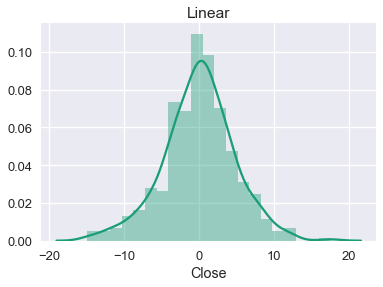

In [227]:
#Evaluating THE linear ridge REGRESSION MODEL
#linear test
import seaborn as sns
residuals_linear = y_train - reg.predict(x_train)
#residuals_nlinear = y_nonlinear - nonlinear.predict(x_reshape)

sns.distplot(residuals_linear);
plt.title('Linear')
#normal distrbution


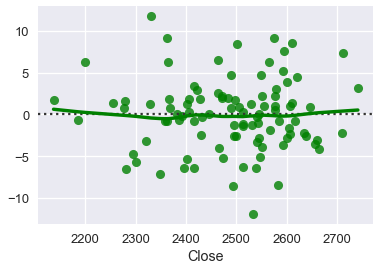

In [228]:
#residual plts

sns.residplot(y_test, (reg.predict(x_test)), lowess=True, color="g")

In [229]:
# multicolinearity 
#plt.scatter(tcs['High'] , tcs['Open'])

print(tcs['High'].corr(tcs['Open'])) # a very high correlation hence get rid of high
print(tcs['Volume'].corr(tcs['Open']))# no correlation so fine here
print(tcs['Low'].corr(tcs['Open']))# a very high correlation hence get rid of Low
print(tcs['shock'].corr(tcs['Open']))# no correlation so fine here
print(tcs['VWAP'].corr(tcs['Open']))# a very high correlation hence get rid of VWAP
print(tcs['price_shock'].corr(tcs['shock']))
print(tcs['Volume'].corr(tcs['price_shock']))
print(tcs['Last'].corr(tcs['Open']))


#  , 'Volume' , 'price_shock' , 'shock' , 'Open' 

0.98725393060403
0.024770932791701526
0.9855006559515576
-0.023402238599109143
0.9832670380309751
0.19354354732584145
-0.32653002951367965
0.9700052559257563


In [230]:
# new model

X = tcs[[ 'Volume' , 'price_shock' , 'shock' , 'Open' ]]
y= tcs['Close']
reg_new = linear_model.LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
reg_new.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [231]:
reg_new.score(x_train,y_train)

0.9444663991257588

In [232]:
reg2n = linear_model.BayesianRidge()
reg2n.fit(x_train,y_train)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [233]:
reg2n.score(x_train,y_train)

0.9441444727651337

In [234]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, (reg2n.predict(x_test))))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,(reg2n.predict(x_test))))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, (reg2n.predict(x_test)))))

Mean Absolute Error: 23.277671837684327
Mean Squared Error: 890.2589793307465
Root Mean Squared Error: 29.837207968084858


In [235]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, (reg_new.predict(x_test))))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,(reg_new.predict(x_test))))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, (reg_new.predict(x_test)))))

Mean Absolute Error: 23.46754698708744
Mean Squared Error: 913.4266288798675
Root Mean Squared Error: 30.22294871252419


In [236]:
#linear regression is better model here it follows all the assumptions now.

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [239]:
mape = mean_absolute_percentage_error(y_test, (reg_new.predict(x_test)))

In [240]:
print("MAPE is = " + str(mape) )

MAPE is = 0.948215196490309


# DATA  VISUALIZATION PART 2

In [242]:
from bokeh.io import show , output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, output_file
output_file("Timesires_plot.html")


In [244]:
#simple blue color time series line

px = figure(plot_height=300, plot_width=800, tools="", toolbar_location=None,
           x_axis_type="datetime",
           background_fill_color="white" )

px.line(tcs.index ,tcs['Close'] , color = '#4D4DFF' , legend = "TCS")
px.line(infy.index ,infy['Close'] , color = '#120A8F' , legend = "INFOSYS")
px.line(niftyit.index ,niftyit['Close'] ,color = '#ADEAEA'  ,legend = "NIFTY_IT")
px.yaxis.axis_label = 'Price'
px.xaxis.axis_label = 'Date'
px.legend.location = "center_left"
px.legend.label_text_font_size = '6pt'





show(px)
